In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [3]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display basic info and check for missing values
print("Dataset Shape:", df.shape)

Dataset Shape: (569, 31)


In [4]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness 

In [5]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Separate features (X) and target (y)
X = df.drop(columns=['target'])
y = df['target']

# Apply Min-Max Scaling to the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Convert back to DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("Scaled Features (first 5 rows):")
print(X_scaled_df.head())

Scaled Features (first 5 rows):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.521037      0.022658        0.545989   0.363733         0.593753   
1     0.643144      0.272574        0.615783   0.501591         0.289880   
2     0.601496      0.390260        0.595743   0.449417         0.514309   
3     0.210090      0.360839        0.233501   0.102906         0.811321   
4     0.629893      0.156578        0.630986   0.489290         0.430351   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.792037        0.703140             0.731113       0.686364   
1          0.181768        0.203608             0.348757       0.379798   
2          0.431017        0.462512             0.635686       0.509596   
3          0.811361        0.565604             0.522863       0.776263   
4          0.347893        0.463918             0.518390       0.378283   

   mean fractal dimension  ...  worst radius  worst texture 

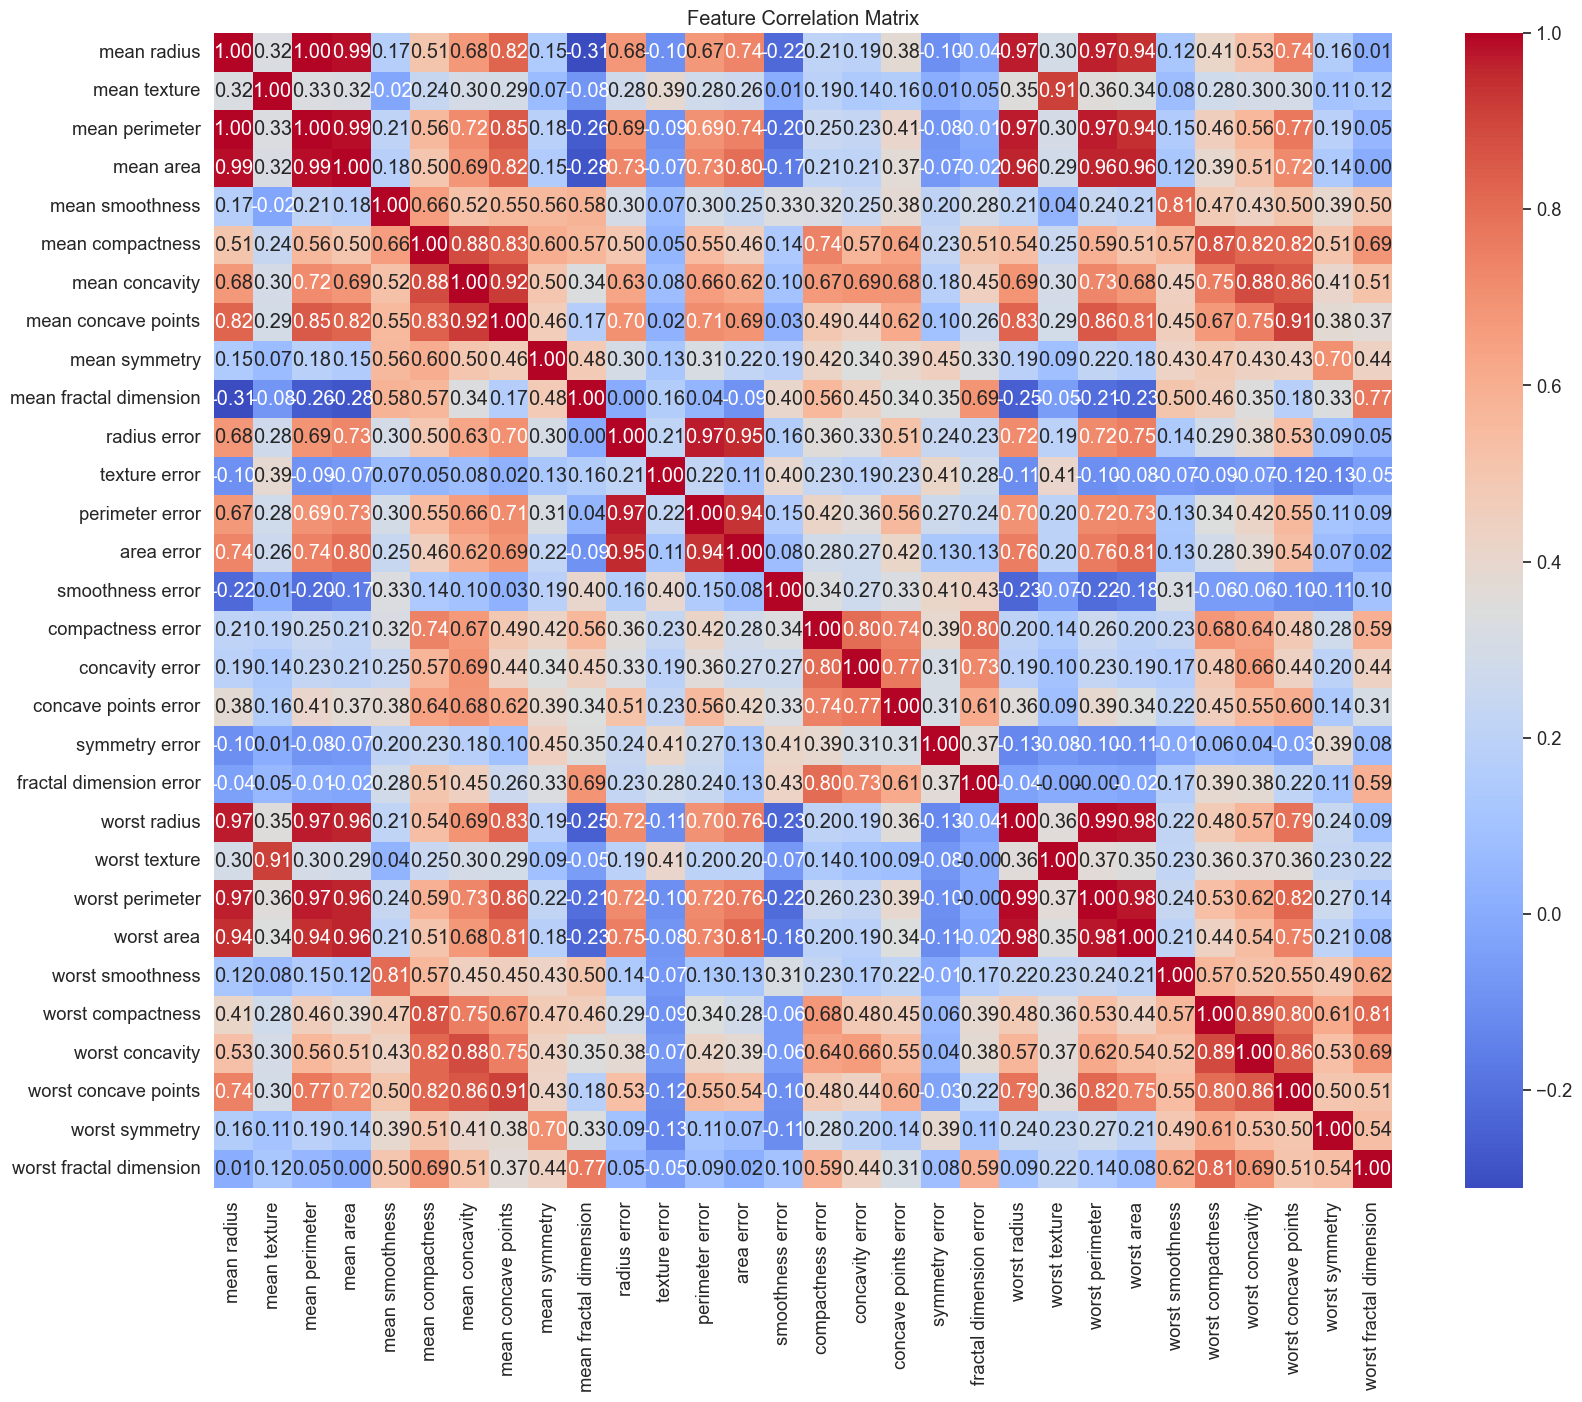

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = X_scaled_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(19, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [24]:
# Pre-pruning 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Build a Decision Tree with pre-pruning parameters
dt_pre = DecisionTreeClassifier(max_depth=4, min_samples_split=10, random_state=42)
dt_pre.fit(X_train, y_train)
y_pred_pre = dt_pre.predict(X_test)

print("Pre-pruning Decision Tree Accuracy:", accuracy_score(y_test, y_pred_pre))

Pre-pruning Decision Tree Accuracy: 0.9385964912280702


In [11]:
#Post-pruning
from sklearn.model_selection import GridSearchCV

# Get the cost complexity pruning path
path = dt_pre.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Setup a parameter grid for ccp_alpha
param_grid = {'ccp_alpha': ccp_alphas}

# Use GridSearchCV to find the best ccp_alpha with 5-fold cross-validation
dt_post = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
dt_post.fit(X_train, y_train)

best_alpha = dt_post.best_params_['ccp_alpha']
print("Best ccp_alpha for post-pruning:", best_alpha)

# Build the post-pruned decision tree using the best alpha
dt_post_best = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=42)
dt_post_best.fit(X_train, y_train)
y_pred_post = dt_post_best.predict(X_test)

print("Post-pruning Decision Tree Accuracy:", accuracy_score(y_test, y_pred_post))

Best ccp_alpha for post-pruning: 0.008663799968147794
Post-pruning Decision Tree Accuracy: 0.956140350877193


In [12]:
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the pre-pruned model
print("=== Pre-pruned Decision Tree Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_pre))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_pre))
print("Classification Report:\n", classification_report(y_test, y_pred_pre))

# Evaluate the post-pruned model
print("=== Post-pruned Decision Tree Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_post))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_post))
print("Classification Report:\n", classification_report(y_test, y_pred_post))

=== Pre-pruned Decision Tree Evaluation ===
Accuracy: 0.9385964912280702
Confusion Matrix:
 [[39  4]
 [ 3 68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

=== Post-pruned Decision Tree Evaluation ===
Accuracy: 0.956140350877193
Confusion Matrix:
 [[40  3]
 [ 2 69]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



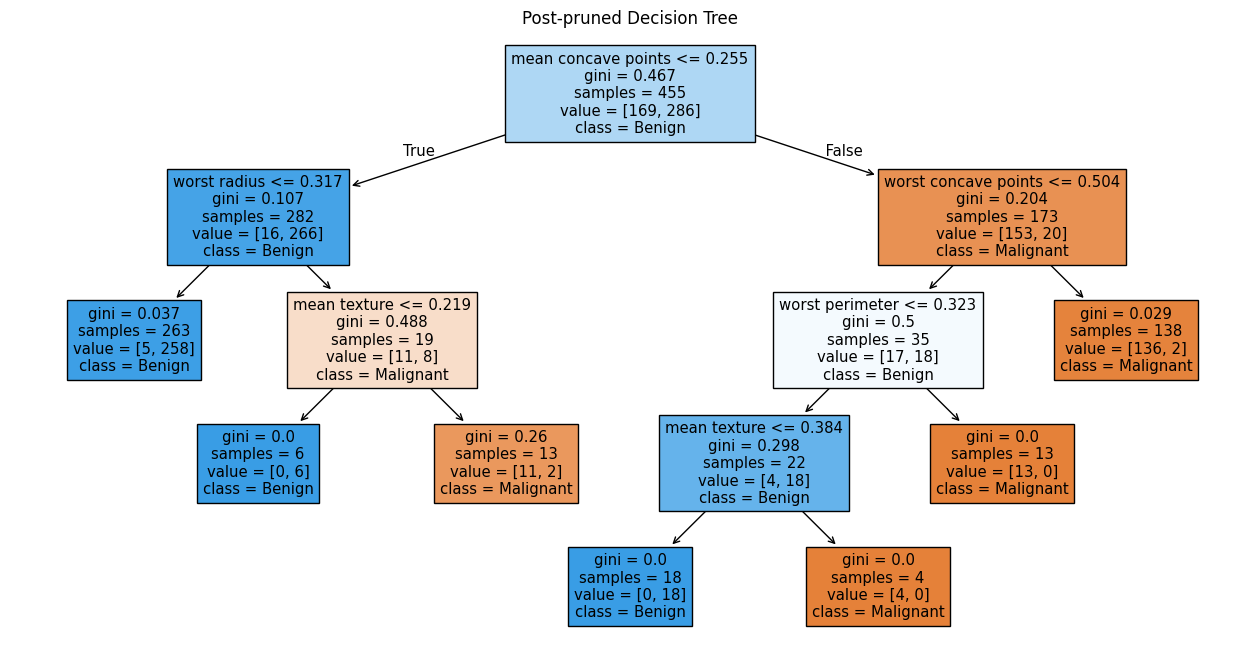

In [13]:
from sklearn.tree import plot_tree

# Visualize the post-pruned Decision Tree
plt.figure(figsize=(16, 8))
plot_tree(dt_post_best, feature_names=X_scaled_df.columns, class_names=['Malignant', 'Benign'], filled=True)
plt.title("Post-pruned Decision Tree")
plt.show()

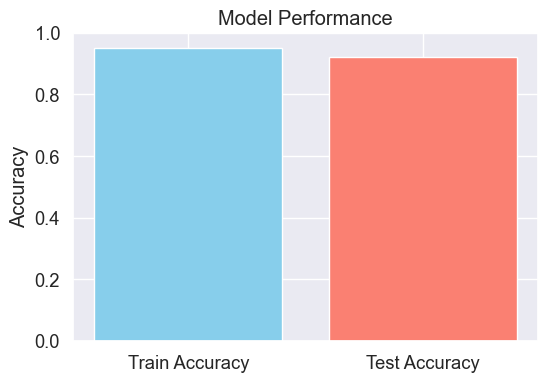

In [25]:
import matplotlib.pyplot as plt

# Example: Suppose these are your final accuracy scores
train_accuracy = 0.95
test_accuracy = 0.92

# Create a bar chart
labels = ['Train Accuracy', 'Test Accuracy']
scores = [train_accuracy, test_accuracy]

plt.figure(figsize=(6, 4))
plt.bar(labels, scores, color=['skyblue', 'salmon'])
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.title('Model Performance')
plt.ylabel('Accuracy')
plt.show()

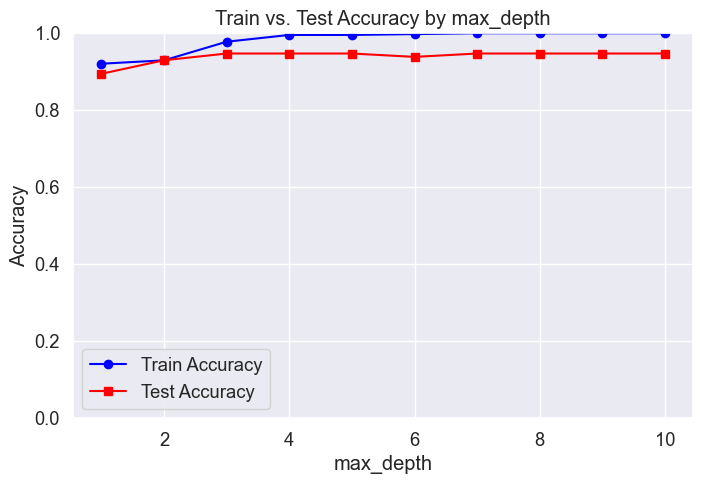

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Example data
train_accuracies = []
test_accuracies = []
max_depth_values = range(1, 11)  # Suppose we test depths from 1 to 10

for depth in max_depth_values:
    # Build and train the model
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    
    # Predict on train and test sets
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)
    
    # Compute accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Store the results
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(max_depth_values, train_accuracies, marker='o', label='Train Accuracy', color='blue')
plt.plot(max_depth_values, test_accuracies, marker='s', label='Test Accuracy', color='red')

plt.title('Train vs. Test Accuracy by max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

In [28]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report

# Create a manual testing dataset 
manual_data = {
    "mean radius": [14.12, 13.10],
    "mean texture": [14.82, 20.54],
    "mean perimeter": [90.16, 86.60],
    "mean area": [600.0, 515.0],
    "mean smoothness": [0.0847, 0.1029],
    "mean compactness": [0.0583, 0.0632],
    "mean concavity": [0.0447, 0.0517],
    "mean concave points": [0.0263, 0.0276],
    "mean symmetry": [0.1601, 0.1744],
    "mean fractal dimension": [0.0559, 0.0655],
    "radius error": [0.27, 0.39],
    "texture error": [1.20, 1.52],
    "perimeter error": [2.57, 2.85],
    "area error": [21.0, 22.5],
    "smoothness error": [0.0042, 0.0053],
    "compactness error": [0.0101, 0.0114],
    "concavity error": [0.0115, 0.0139],
    "concave points error": [0.0067, 0.0072],
    "symmetry error": [0.0121, 0.0154],
    "fractal dimension error": [0.0022, 0.0031],
    "worst radius": [15.50, 14.80],
    "worst texture": [16.60, 22.30],
    "worst perimeter": [98.20, 95.60],
    "worst area": [700.0, 653.0],
    "worst smoothness": [0.0932, 0.1078],
    "worst compactness": [0.0745, 0.0853],
    "worst concavity": [0.0653, 0.0742],
    "worst concave points": [0.0342, 0.0401],
    "worst symmetry": [0.1803, 0.1932],
    "worst fractal dimension": [0.0659, 0.0712],
    "target": [0, 1]  # 0: malignant, 1: benign 
}

# Create DataFrame for manual testing dataset
manual_df = pd.DataFrame(manual_data)

# Separate features and target for manual dataset
X_manual = manual_df.drop(columns=['target'])
y_manual = manual_df['target']

# Apply the same scaling (using the same scaler fitted on the training data)
X_manual_scaled = scaler.transform(X_manual)

# Use the trained model to predict on the manual testing dataset
y_manual_pred = model.predict(X_manual_scaled)

# Evaluate performance on the manual dataset
print("\nManual Test Data Accuracy:", accuracy_score(y_manual, y_manual_pred))
print("Manual Test Data Classification Report:\n", classification_report(y_manual, y_manual_pred))


Manual Test Data Accuracy: 0.5
Manual Test Data Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\dnyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dnyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dnyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo